### Load data

In [1]:
from sklearn import datasets
import pandas as pd
pd.set_option('display.max_columns', None)
import sys
sys.path.append('../../')

iris = datasets.load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
target = pd.Series(iris.target)
df = pd.concat([data, target], axis=1)
df.columns.values[-1] = 'target'

### Initialize a TabularMagic object

In [2]:
from tabularmagic.api import TabularMagic
tm = TabularMagic(df, test_size=0.2, name='Iris scikit-learn dataset')
tm

INFO: Initialization complete. Shapes of train, test DataFrames: (120, 5), (30, 
      5). 


Iris scikit-learn dataset 
--------------------------------------------------------------------------------
Train shape: (120, 5)                    Test shape: (30, 5)                    
--------------------------------------------------------------------------------
Categorical variables:
  None 
                                                                                
Continuous variables:
  sepallength(cm), sepalwidth(cm), petallength(cm), petalwidth(cm), target 

### Preprocessing

Force target to categorical

In [3]:
tm.datahandler().force_categorical(['target'])

INFO: Forced variables target to categorical. 


Iris scikit-learn dataset 
--------------------------------------------------------------------------------
Train shape: (120, 5)                    Test shape: (30, 5)                    
--------------------------------------------------------------------------------
Categorical variables:
  target 
                                                                                
Continuous variables:
  sepallength(cm), sepalwidth(cm), petallength(cm), petalwidth(cm) 

### Conduct exploratory analysis

Visualize the distribution of petallength(cm) stratified by the target

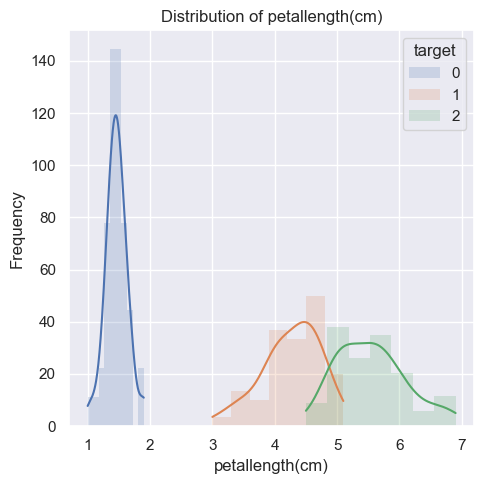

In [4]:
tm.eda(dataset='all').plot_distribution_stratified(
    'petallength(cm)', 'target', strategy='stacked_hist_kde_frequency')

Visualize the distribution of all continuous variables

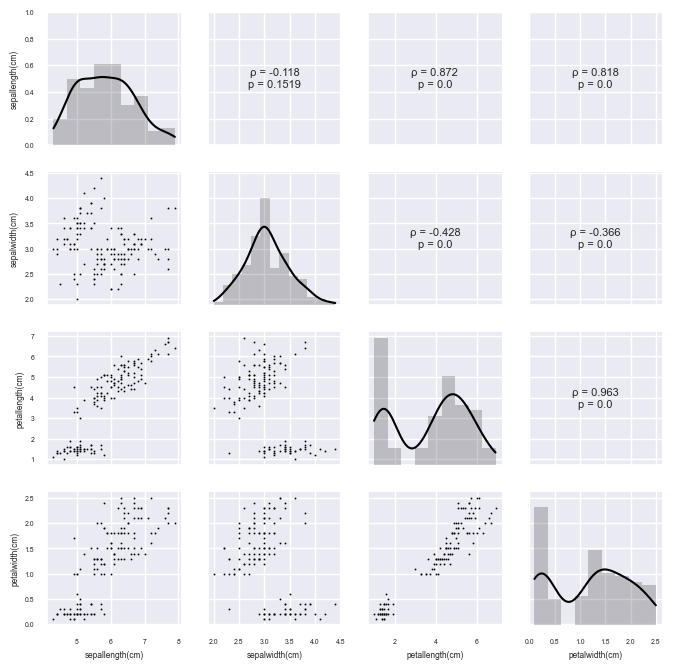

In [5]:
tm.eda(dataset='all').plot_continuous_pairs(
    continuous_vars=tm.datahandler().continuous_vars()
)

Visualize PCA stratified by the target label

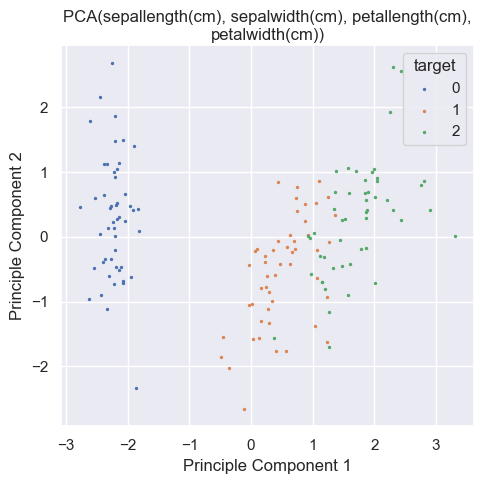

In [6]:
tm.eda(dataset='all').plot_pca(
    continuous_vars=tm.datahandler().continuous_vars(), 
    stratify_by='target')

### Machine learning classification benchmarking

In [7]:
from tabularmagic.api.mlC import LinearC, TreeC, TreeEnsembleC

report = tm.ml_classification(
    models=[
        LinearC(type='no_penalty'),
        LinearC(type='l2'),
        LinearC(type='elasticnet'),
        TreeC(),
        TreeEnsembleC(type='xgboostrf', verbose=2, n_jobs=-1),
    ], 
    y_var='target',
)

INFO: Fitting model LinearC(no_penalty). 
INFO: Fitted model LinearC(no_penalty). 
INFO: Fitting model LinearC(l2). 
INFO: Fitted model LinearC(l2). 
INFO: Fitting model LinearC(elasticnet). 
INFO: Fitted model LinearC(elasticnet). 
INFO: Fitting model TreeC. 
INFO: Fitted model TreeC. 
INFO: Fitting model TreeEnsembleC(xgboostrf). 
Fitting 5 folds for each of 729 candidates, totalling 3645 fits
[CV] END colsample_bynode=0.5, max_depth=3, min_child_weight=1, n_estimators=50, reg_lambda=0.1, subsample=0.5; total time=   0.0s
[CV] END colsample_bynode=0.5, max_depth=3, min_child_weight=1, n_estimators=50, reg_lambda=0.1, subsample=0.8; total time=   0.0s
[CV] END colsample_bynode=0.5, max_depth=3, min_child_weight=1, n_estimators=50, reg_lambda=0.1, subsample=0.8; total time=   0.0s
[CV] END colsample_bynode=0.5, max_depth=3, min_child_weight=1, n_estimators=50, reg_lambda=0.1, subsample=1.0; total time=   0.0s
[CV] END colsample_bynode=0.5, max_depth=3, min_child_weight=1, n_estimators=

View averaged fit statistics across folds

In [9]:
report.fit_statistics('test')

,LinearC(no_penalty),LinearC(l2),LinearC(elasticnet),TreeC,TreeEnsembleC(xgboostrf)
Statistic,,,,,
accuracy,1.0,1.0,1.0,1.0,1.0
f1,1.0,1.0,1.0,1.0,1.0
precision,1.0,1.0,1.0,1.0,1.0
recall,1.0,1.0,1.0,1.0,1.0
roc_auc,1.0,1.0,1.0,1.0,1.0
n,30,30,30,30,30


View fit statistics for each fold

In [10]:
report.cv_fit_statistics()

WARN: Cross validation statistics are not available for models that are not 
      cross-validated. 


In [11]:
report.fit_statistics('test')

,LinearC(no_penalty),LinearC(l2),LinearC(elasticnet),TreeC,TreeEnsembleC(xgboostrf)
Statistic,,,,,
accuracy,1.0,1.0,1.0,1.0,1.0
f1,1.0,1.0,1.0,1.0,1.0
precision,1.0,1.0,1.0,1.0,1.0
recall,1.0,1.0,1.0,1.0,1.0
roc_auc,1.0,1.0,1.0,1.0,1.0
n,30,30,30,30,30


View fit statistics for a particular class for elasticnet